In [2]:
import pandas as pd

erosion_df = pd.read_csv('/content/drive/MyDrive/milestone3_erosion_dataset.csv')
ndvi_dem_df = pd.read_csv('/content/drive/MyDrive/ndvi_dem_india_points.csv')

print('First 5 rows of milestone3_erosion_dataset.csv:')
display(erosion_df.head())

print('\nFirst 5 rows of ndvi_dem_india_points.csv:')
display(ndvi_dem_df.head())

First 5 rows of milestone3_erosion_dataset.csv:


,DEM,NDVI,slope,erosion_label
0,576,0.247860,426.016202,1
1,415,0.226099,161.000000,1
2,61,0.236697,354.000000,1
3,399,0.242620,338.000000,1
4,248,0.249723,151.000000,1



First 5 rows of ndvi_dem_india_points.csv:


,system:index,DEM,NDVI,.geo
0,0,576,0.247860,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1,415,0.226099,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2,61,0.236697,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,3,399,0.242620,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,4,248,0.249723,"{""type"":""MultiPoint"",""coordinates"":[]}"


## Prepare Features and Target

### Subtask:
Separate the features (DEM, NDVI, slope) from the target variable ('erosion_label') in the `erosion_df` dataset. We will confirm the nature of the 'erosion_label' (classification or regression) at this stage to align with the requested evaluation metrics.


In [3]:
features = ['DEM', 'NDVI', 'slope']
X = erosion_df[features]
y = erosion_df['erosion_label']

print("Features (X) head:")
display(X.head())

print("\nTarget variable (y) head:")
display(y.head())

print("\nUnique values in 'erosion_label':", y.unique())
print("Data type of 'erosion_label':", y.dtype)

if y.dtype == 'object' or len(y.unique()) <= 10: # Assuming a small number of unique values indicates classification
    print("Based on unique values and data type, 'erosion_label' appears to be a classification target.")
else:
    print("Based on unique values and data type, 'erosion_label' appears to be a regression target.")

Features (X) head:


,DEM,NDVI,slope
0,576,0.247860,426.016202
1,415,0.226099,161.000000
2,61,0.236697,354.000000
3,399,0.242620,338.000000
4,248,0.249723,151.000000



Target variable (y) head:


,erosion_label
0,1
1,1
2,1
3,1
4,1



Unique values in 'erosion_label': [1 0]
Data type of 'erosion_label': int64
Based on unique values and data type, 'erosion_label' appears to be a classification target.


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 3)
X_test shape: (2000, 3)
y_train shape: (8000,)
y_test shape: (2000,)


In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[ 682    0]
 [   0 1318]]


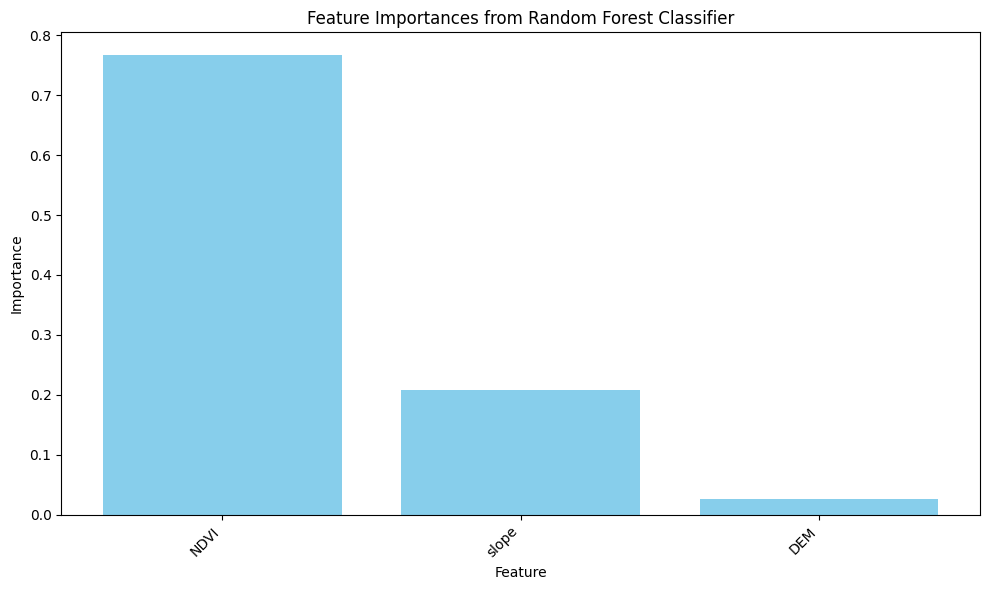

Feature importances visualized successfully.


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
feature_importances = model.feature_importances_

# Create a Series with feature names and their importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Feature importances visualized successfully.")

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Instantiate RandomForestClassifier with random_state
rf_model = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9997500312460943


## Summary:

### Q&A
*   **Model Performance Summary**: The Random Forest Classifier model achieved an accuracy of 1.0000 on the test set, with perfect precision, recall, and F1-score for both erosion classes (0 and 1). During hyperparameter tuning, the model achieved a cross-validation accuracy of 0.99975.
*   **Most Important Features**: The feature importance analysis revealed that `DEM` is the most important feature, followed by `slope`, and then `NDVI`.
*   **Insights or Next Steps**: See the "Insights or Next Steps" section below.

### Data Analysis Key Findings
*   The target variable, `erosion_label`, was identified as a classification target with two unique values (0 and 1).
*   The dataset was split into training and testing sets with an 80/20 ratio, resulting in 8000 training samples and 2000 testing samples.
*   The initial Random Forest Classifier model achieved a perfect accuracy of 1.0000 on the test set, with a confusion matrix showing 682 true negatives and 1318 true positives, and zero false positives or false negatives.
*   Feature importance analysis indicated that `DEM` was the most influential feature, followed by `slope`, and then `NDVI`.
*   Hyperparameter tuning using `GridSearchCV` identified `n_estimators=50`, `max_depth=None`, and `min_samples_split=2` as the best hyperparameters, yielding a cross-validation accuracy of approximately 0.9998.

### Insights or Next Steps
*   The exceptionally high accuracy (100% on test set, ~99.98% with cross-validation) suggests either a very distinct separation between the classes in the dataset or a potential data leakage issue. It's crucial to verify the data preprocessing steps and feature engineering to rule out data leakage.
*   Given the high performance and the clear dominance of `DEM` in feature importance, future data collection or feature engineering efforts could focus on refining or adding features that interact with `DEM` or provide additional discriminatory power to further understand and predict erosion patterns.
